# **K Means Clustering Algorithm**

Clustering is an unsupervised machine learning process which learns from data it self rather than from labeled examples. It splits the data into distinct groups based on the features that are supplied to it. There are number of clustering methods available such as DBscan, gaussian mixture modelling and also k means clustering.

The main objective of k-means clustering algorithm is to reduce or minimize the sum of distances between the center of the cluster and the other points.


**Steps of how k-means clustering works:**

1. Define the number (K) of clusters to split data into
2. Select k random points within the data
3. Calculate the eucledean distance between control and other points
4. Assign the point to the closest centroid
5. Calculate the centre of each cluster
6. Repeat step 3-5

In [18]:
# loading data
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [4]:
df = pd.read_csv('../Data/inputs/xeek/kmeans_XeekForceML2020.csv', index_col='DEPTH_MD')

In [5]:
df

,CALI,RHOB,GR,NPHI,PEF,DTC
DEPTH_MD,,,,,,
494.528000,19.480835,1.884186,80.200851,NaN,20.915468,161.131180
494.680000,19.468800,1.889794,79.262886,NaN,19.383013,160.603470
494.832000,19.468800,1.896523,74.821999,NaN,22.591518,160.173615
494.984000,19.459282,1.891913,72.878922,NaN,32.191910,160.149429
495.136000,19.453100,1.880034,71.729141,NaN,38.495632,160.128342
...,...,...,...,...,...,...
2207.310396,8.698007,2.531374,127.456139,NaN,3.607062,NaN
2207.462396,8.721210,2.526128,128.403305,NaN,3.609151,NaN
2207.614396,8.739136,2.528934,127.829262,NaN,3.594580,NaN


In [6]:
df.dropna(inplace=True)

In [8]:
df.describe()

,CALI,RHOB,GR,NPHI,PEF,DTC
count,82707.000000,82707.000000,82707.000000,82707.000000,82707.000000,82707.000000
mean,11.861334,2.216691,67.783745,0.364424,4.598084,116.223589
std,2.912147,0.225393,36.636006,0.139774,3.749671,30.746876
min,5.946157,1.412190,5.782680,-0.005300,1.126667,7.415132
25%,8.881405,2.034995,44.245249,0.242985,3.139974,86.342911
50%,12.393679,2.178415,64.694214,0.403425,4.012491,125.810211
75%,13.214085,2.421519,87.452480,0.484451,5.245409,144.039345
max,25.717396,3.005321,804.298950,0.800262,288.103638,230.432953


# Transforming Data
## Scaler transform
Standardise the data using the StandardScaler fiunction from sklearn.
To account for variations in measurements units and scale, it is common practice prior to machine learning to standardise the data.

This is done by taking the feature, and subtracting the mean of that feature from the values, and then dividing by the feature's standard deviation.

z = Xi- mean of x/standard deviation of x

This process can be influenced bu outliers (anomalous points) within the data, so it is essential these are identified and dealt with prior to this step.

In [9]:
scaler = StandardScaler()

We then fit the standard scaler tp the data, then transform our data using the scaler.

In [13]:
df[['CALI_T','RHOB_T','NPHI_T','GR_T',"PEF_T", 'DTC_T']] = scaler.fit_transform(df[['CALI','RHOB','NPHI',
                                                                            'GR','PEF','DTC']])

In [14]:
df



,CALI,RHOB,GR,NPHI,PEF,DTC,CALI_T,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T
DEPTH_MD,,,,,,,,,,,,
1138.704000,19.322735,1.774626,55.892757,0.765867,1.631495,147.837677,2.562180,-1.961323,2.872099,-0.324573,-0.791165,1.028211
1138.856000,18.613674,1.800986,60.929138,0.800262,1.645080,142.382431,2.318695,-1.844371,3.118177,-0.187101,-0.787542,0.850786
1139.008000,18.212072,1.817696,62.117264,0.765957,1.645873,138.258331,2.180788,-1.770232,2.872743,-0.154671,-0.787330,0.716654
1139.160000,18.134182,1.829333,61.010860,0.702521,1.620216,139.198914,2.154041,-1.718601,2.418894,-0.184871,-0.794173,0.747245
1139.312000,18.033762,1.813854,58.501236,0.639708,1.504854,144.290085,2.119558,-1.787279,1.969499,-0.253373,-0.824939,0.912830
...,...,...,...,...,...,...,...,...,...,...,...,...
2196.062396,8.722105,2.537510,132.450317,0.112312,3.663386,70.126060,-1.077984,1.423388,-1.803723,1.765120,-0.249276,-1.499268
2196.214396,8.701121,2.526997,131.869812,0.116130,3.629687,70.316216,-1.085190,1.376745,-1.776406,1.749275,-0.258263,-1.493083
2196.366396,8.710958,2.520570,127.004021,0.120230,3.615547,70.462158,-1.081812,1.348228,-1.747068,1.616460,-0.262034,-1.488337


## Clustering the Data 

### Identify optimum number of clusters

There are a number of ways to identify the optimum number of clusters. The method we are going to use is called Elbow method.

The Elbow plot allows us to plot the inertia, which is a measure of how well the data was clustered by the K-Means algorithm, against the number of clusters. From this  plot, we are looking for a point where inertia begins to slow

In [20]:
# create a function to wokrout optimum number of clusters

def optimise_K_means(data, max_k):
    means=[]
    inertias =[]
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    # geenrate elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertias')
    plt.grid(True)
    plt.show()

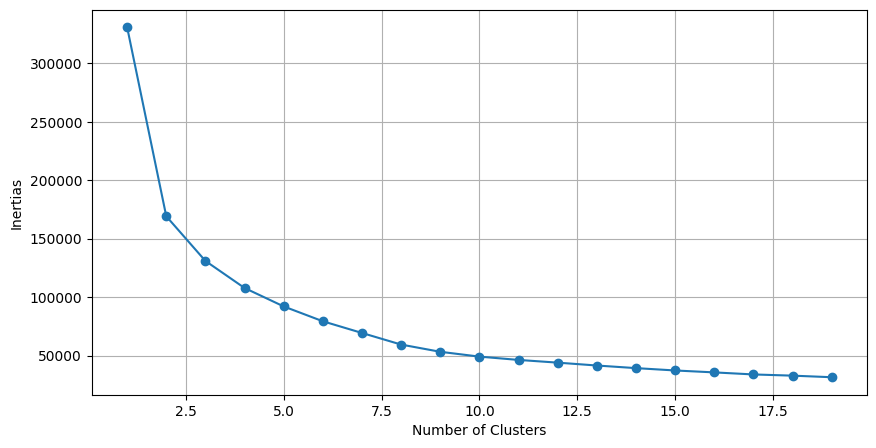

In [26]:
optimise_K_means(df[['RHOB_T', 'NPHI_T', 'GR_T', 'CALI_T']], 20)

In the plot above, we can see that the inertia (sum of squared distances to the nearest cluster center) decreases as we increase the number of clusters. We can see that there is a big change in inertia and slope from  2 clusters onwards.

## Applying K-means Clusters

In [25]:
kmeans = KMeans(n_clusters=5)

In [27]:
kmeans.fit(df[['RHOB_T', 'NPHI_T', 'GR_T', 'CALI_T']])

KMeans(n_clusters=5)

In [28]:
df['kmeans_5'] = kmeans.labels_

In [29]:
df

,CALI,RHOB,GR,NPHI,PEF,DTC,CALI_T,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_5
DEPTH_MD,,,,,,,,,,,,,
1138.704000,19.322735,1.774626,55.892757,0.765867,1.631495,147.837677,2.562180,-1.961323,2.872099,-0.324573,-0.791165,1.028211,1
1138.856000,18.613674,1.800986,60.929138,0.800262,1.645080,142.382431,2.318695,-1.844371,3.118177,-0.187101,-0.787542,0.850786,1
1139.008000,18.212072,1.817696,62.117264,0.765957,1.645873,138.258331,2.180788,-1.770232,2.872743,-0.154671,-0.787330,0.716654,1
1139.160000,18.134182,1.829333,61.010860,0.702521,1.620216,139.198914,2.154041,-1.718601,2.418894,-0.184871,-0.794173,0.747245,1
1139.312000,18.033762,1.813854,58.501236,0.639708,1.504854,144.290085,2.119558,-1.787279,1.969499,-0.253373,-0.824939,0.912830,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196.062396,8.722105,2.537510,132.450317,0.112312,3.663386,70.126060,-1.077984,1.423388,-1.803723,1.765120,-0.249276,-1.499268,3
2196.214396,8.701121,2.526997,131.869812,0.116130,3.629687,70.316216,-1.085190,1.376745,-1.776406,1.749275,-0.258263,-1.493083,3
2196.366396,8.710958,2.520570,127.004021,0.120230,3.615547,70.462158,-1.081812,1.348228,-1.747068,1.616460,-0.262034,-1.488337,3


## Visualising results

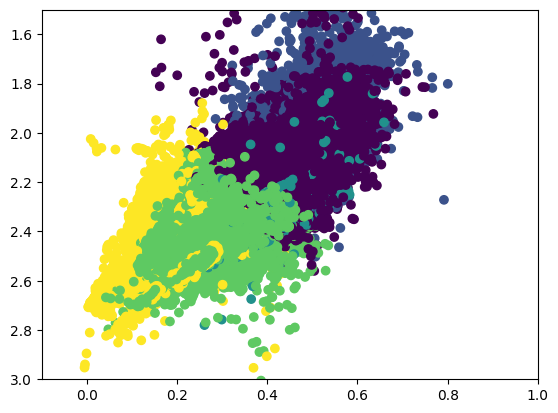

In [30]:
plt.scatter(x=df.NPHI, y=df.RHOB, c=df.kmeans_5)
plt.xlim(-0.1,1)
plt.ylim(3,1.5)
plt.show()

# Creating Multiple Clusters

In [38]:
for k in range(1,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['RHOB_T', 'NPHI_T', 'CALI_T','GR_T']])
    df[f'Kmeans_{k}'] = kmeans.labels_

In [39]:
df

,CALI,RHOB,GR,NPHI,PEF,DTC,CALI_T,RHOB_T,NPHI_T,GR_T,PEF_T,DTC_T,kmeans_5,Kmeans_1,Kmeans_2,Kmeans_3,Kmeans_4,Kmeans_5
DEPTH_MD,,,,,,,,,,,,,,,,,,
1138.704000,19.322735,1.774626,55.892757,0.765867,1.631495,147.837677,2.562180,-1.961323,2.872099,-0.324573,-0.791165,1.028211,1,0,1,1,1,2
1138.856000,18.613674,1.800986,60.929138,0.800262,1.645080,142.382431,2.318695,-1.844371,3.118177,-0.187101,-0.787542,0.850786,1,0,1,1,1,2
1139.008000,18.212072,1.817696,62.117264,0.765957,1.645873,138.258331,2.180788,-1.770232,2.872743,-0.154671,-0.787330,0.716654,1,0,1,1,1,2
1139.160000,18.134182,1.829333,61.010860,0.702521,1.620216,139.198914,2.154041,-1.718601,2.418894,-0.184871,-0.794173,0.747245,1,0,1,1,1,2
1139.312000,18.033762,1.813854,58.501236,0.639708,1.504854,144.290085,2.119558,-1.787279,1.969499,-0.253373,-0.824939,0.912830,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196.062396,8.722105,2.537510,132.450317,0.112312,3.663386,70.126060,-1.077984,1.423388,-1.803723,1.765120,-0.249276,-1.499268,3,0,0,2,0,4
2196.214396,8.701121,2.526997,131.869812,0.116130,3.629687,70.316216,-1.085190,1.376745,-1.776406,1.749275,-0.258263,-1.493083,3,0,0,2,0,4
2196.366396,8.710958,2.520570,127.004021,0.120230,3.615547,70.462158,-1.081812,1.348228,-1.747068,1.616460,-0.262034,-1.488337,3,0,0,2,0,4


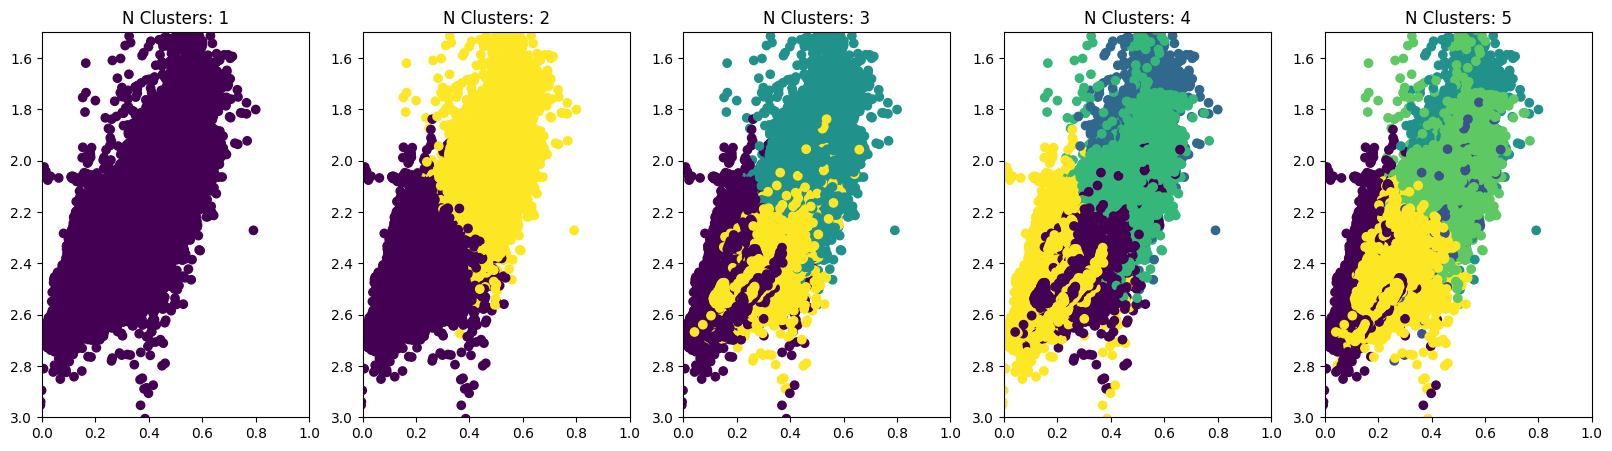

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax.scatter(x=df['NPHI'], y=df['RHOB'], c=df[f'Kmeans_{i}'])
    ax.set_ylim(3,1.5)
    ax.set_xlim(0,1)
    ax.set_title(f'N Clusters: {i}')
               

# Summary:
K-Means clustering is a very helpful algorithm which can help us do unsupervised machine learning. We can see more examples on sklearn website etc.


Dilshad Raza\
21/08/2022